# Merchandise-Popularity-Prediction


Big Brands spend a significant amount on popularizing a product.  Nevertheless, their efforts go in vain while establishing the merchandise in the hyperlocal market. Based on different geographical conditions same attributes can communicate a piece of much different information about the customer.

Target is to build a machine learning model to forecast the popularity of merchandise for an eCommerce company. The popularity class will decide how popular the product is, given the attributes which a store owner can control to make it happen.

https://machinehack.com/hackathon/merchandise_popularity_prediction_challenge/overview



# Importing required libraries

In [367]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the dataset

In [368]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [369]:
# Load the dataset using pandas
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [370]:
# Make a copy of the dataset 
df_copy_train = df_train.copy(deep = True)
df_copy_test = df_test.copy(deep = True)

# Identifying the number of features or columns

In [371]:
# Check the shape of train dataset
df_train.shape

(18208, 12)

In [372]:
# Check the shape of test dataset
df_test.shape

(12140, 11)

# Columns

In [373]:
# Check the columns in the train dataset
df_train.columns

Index(['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score',
       'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3',
       'Score_4', 'time', 'popularity'],
      dtype='object')

In [374]:
# Check which columns are having categorical, numerical or boolean values of train dataset
df_train.dtypes

Store_Ratio       float64
Basket_Ratio      float64
Category_1          int64
Store_Score       float64
Category_2          int64
Store_Presence    float64
Score_1           float64
Score_2           float64
Score_3           float64
Score_4           float64
time                int64
popularity          int64
dtype: object

# Describe Dataset

In [375]:

df_train.describe()

Store_Ratio  Basket_Ratio  ...          time    popularity
count  18208.000000  18208.000000  ...  1.820800e+04  18208.000000
mean       0.544283      0.483585  ...  2.180101e+05      3.850231
std        0.202709      0.302010  ...  9.648289e+04      0.544226
min        0.000000      0.000216  ...  3.184400e+04      0.000000
25%        0.411000      0.200000  ...  1.696202e+05      4.000000
50%        0.573000      0.517000  ...  2.046460e+05      4.000000
75%        0.699000      0.742000  ...  2.471562e+05      4.000000
max        0.998000      1.000000  ...  3.908467e+06      5.000000

[8 rows x 12 columns]

In [376]:
# For more information on the train dataset like the total count in all the columns
# min, max values and more information of the respective columns  


In [377]:
# check the lenght of test and train dataset
print('train data - ',len(df_train))
print('test data - ',len(df_test))

train data -  18208
test data -  12140


# Missing value

In [378]:
# Check for missing values in all the columnns of the train dataset
df_train.isna().any()

Store_Ratio       False
Basket_Ratio      False
Category_1        False
Store_Score       False
Category_2        False
Store_Presence    False
Score_1           False
Score_2           False
Score_3           False
Score_4           False
time              False
popularity        False
dtype: bool

There is no missing values in this dataset

In [379]:
# Check for missing values in all the columnns of the test dataset
df_test.isna().any()

Store_Ratio       False
Basket_Ratio      False
Category_1        False
Store_Score       False
Category_2        False
Store_Presence    False
Score_1           False
Score_2           False
Score_3           False
Score_4           False
time              False
dtype: bool

There is no missing values in this dataset

In [380]:
df_train.isin([-np.inf,np.inf]).any()

Store_Ratio       False
Basket_Ratio      False
Category_1        False
Store_Score       False
Category_2        False
Store_Presence    False
Score_1           False
Score_2           False
Score_3           False
Score_4           False
time              False
popularity        False
dtype: bool

In [381]:
df_test.isin([-np.inf,np.inf]).any()

Store_Ratio       False
Basket_Ratio      False
Category_1        False
Store_Score       False
Category_2        False
Store_Presence    False
Score_1           False
Score_2           False
Score_3           False
Score_4           False
time              False
dtype: bool

# CORRELATION MATRIX



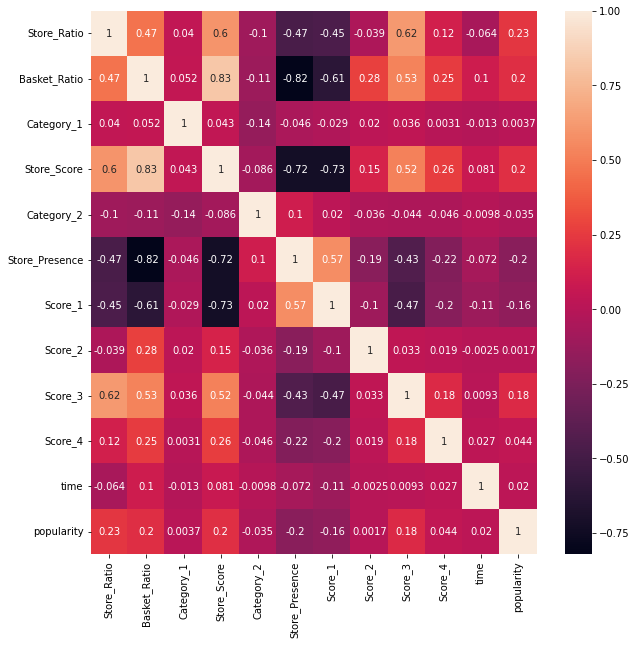

In [382]:
#correlation 
#perfom correlation matrix Using pandas
plt.subplots(figsize = (10,10))
sns.heatmap(df_train.corr(),annot = True)

Few cases of high correlation exist. Have to be considered while dealing with linear models

# HISTOGRAM


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fadfab1c9d0>,
      dtype=object)

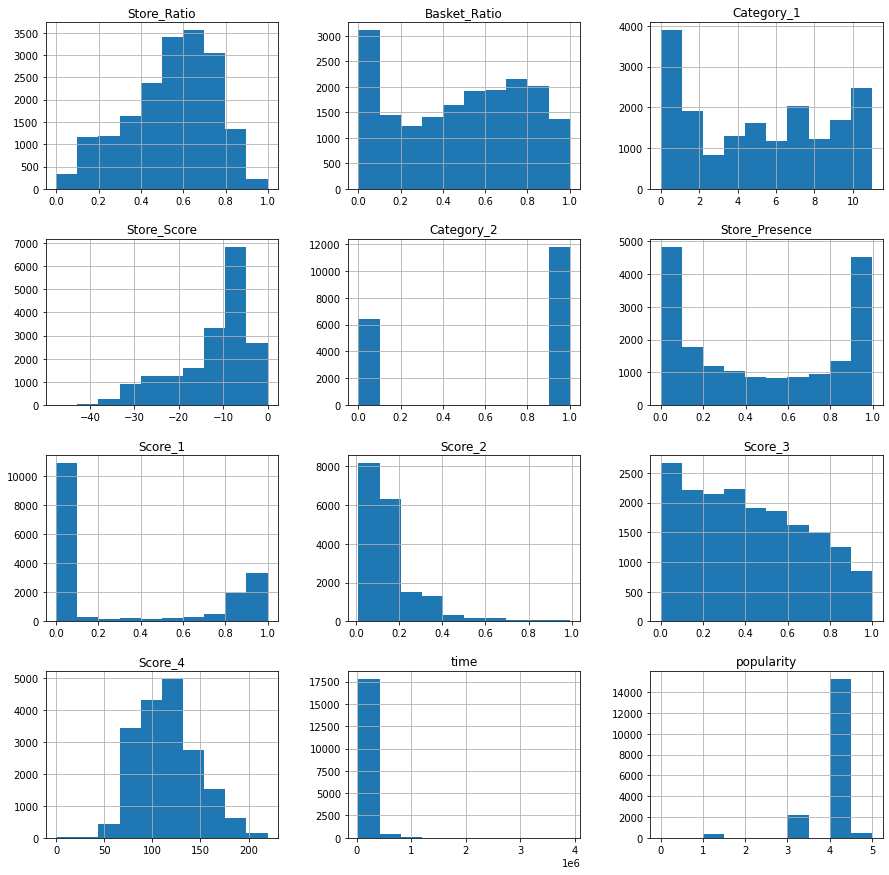

In [387]:
df_train.hist(figsize=(15,15))

# SCATTER PLOT


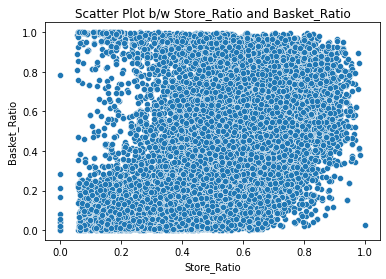

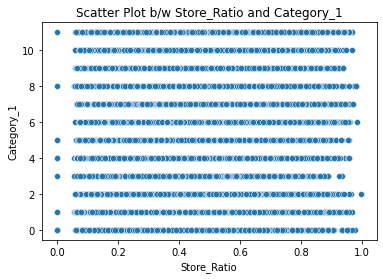

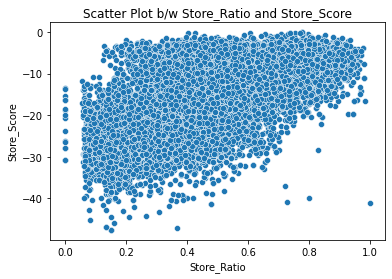

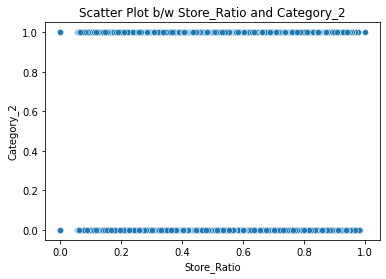

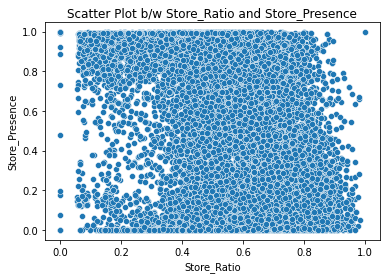

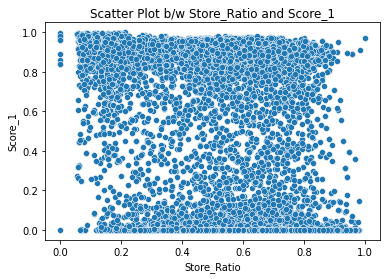

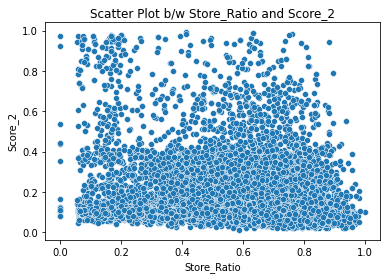

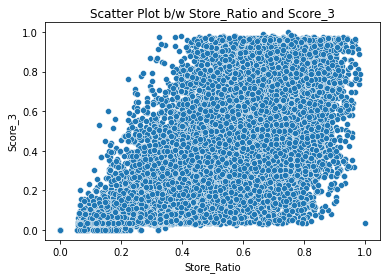

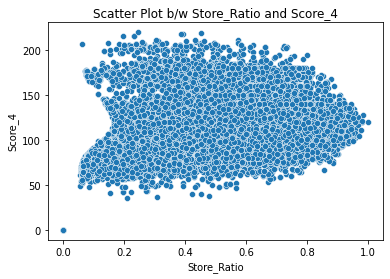

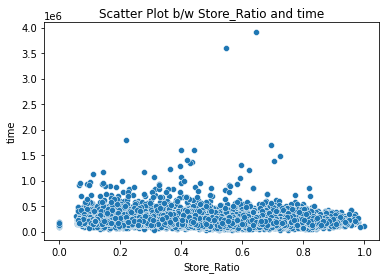

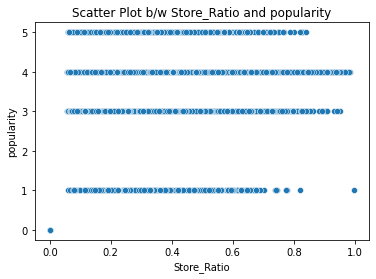

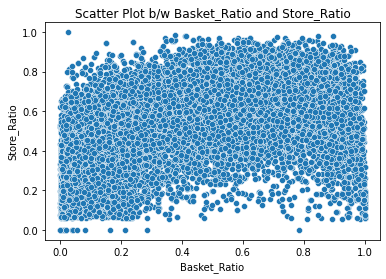

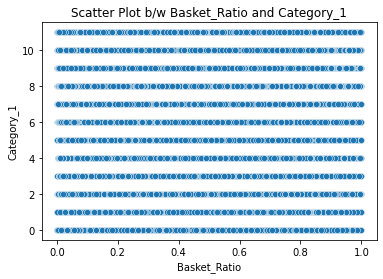

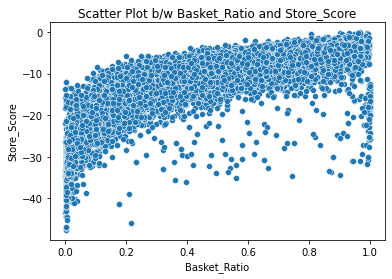

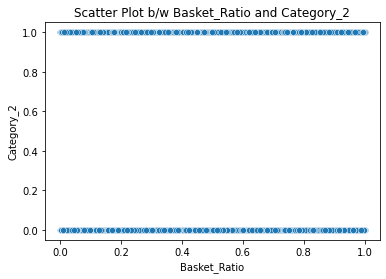

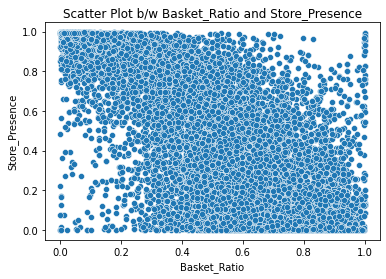

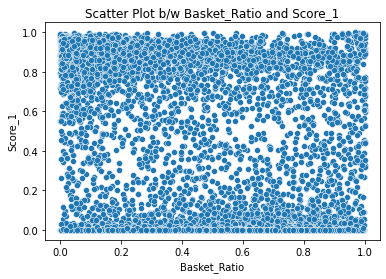

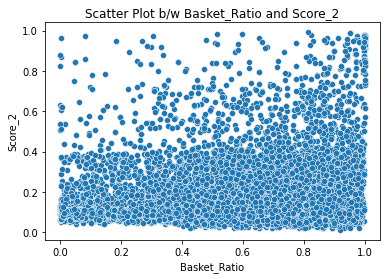

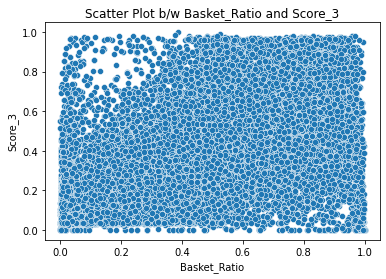

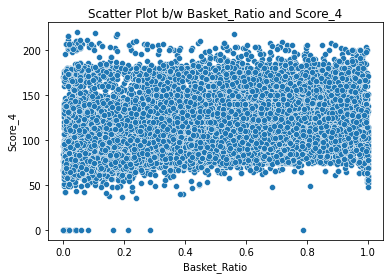

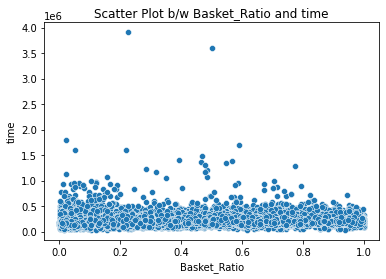

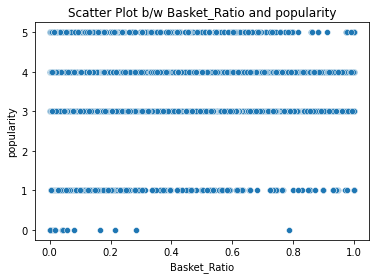

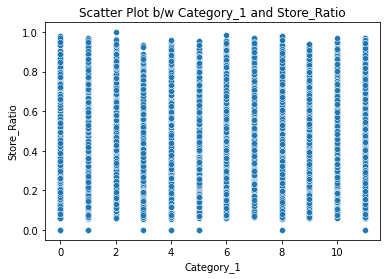

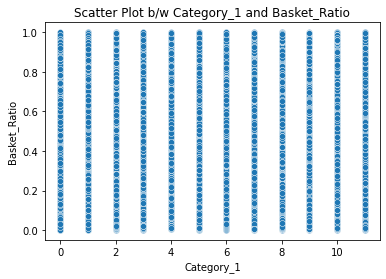

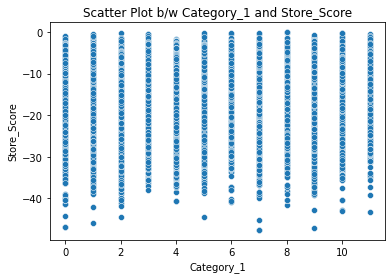

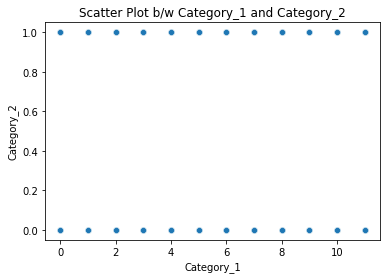

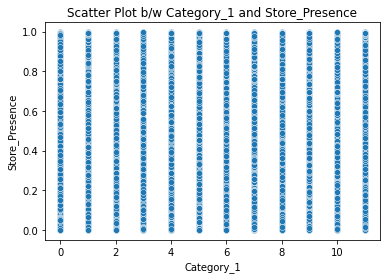

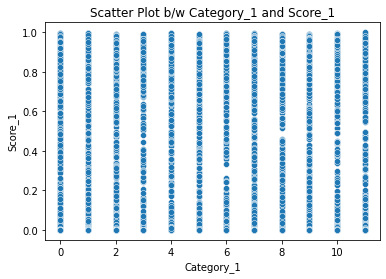

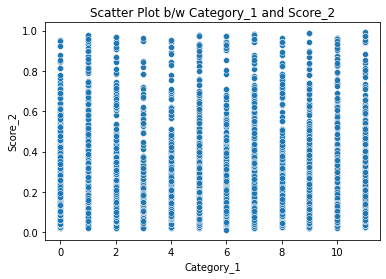

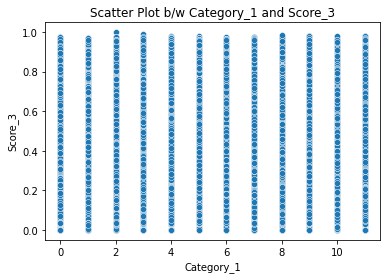

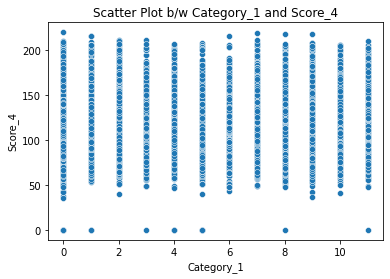

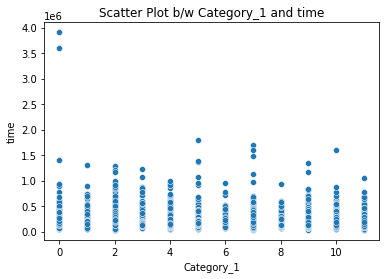

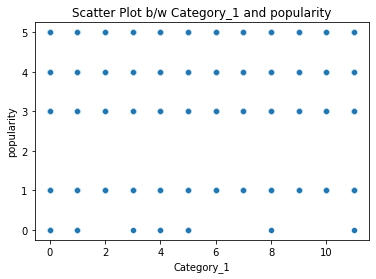

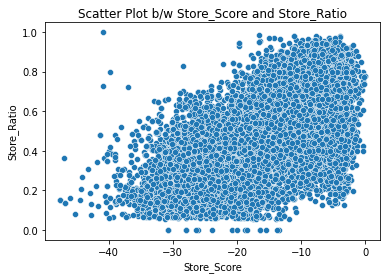

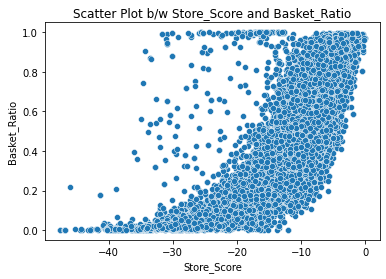

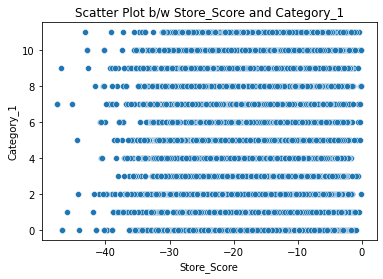

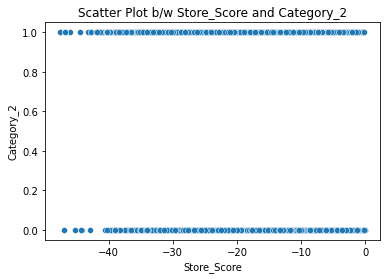

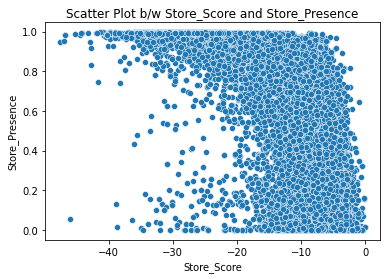

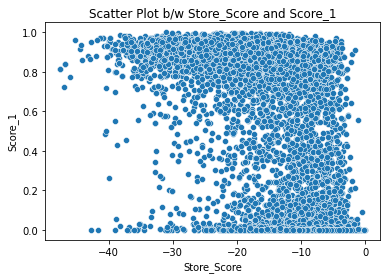

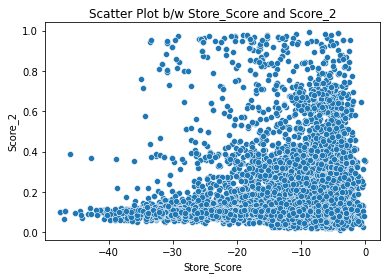

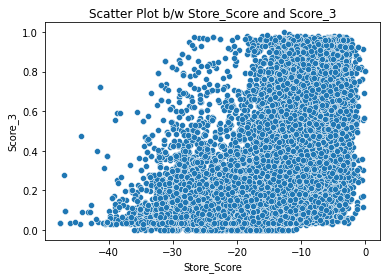

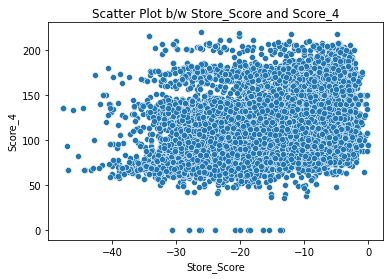

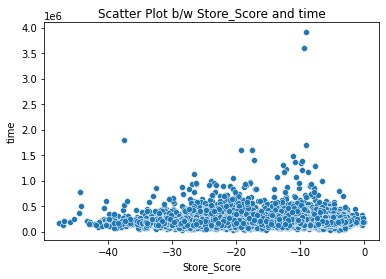

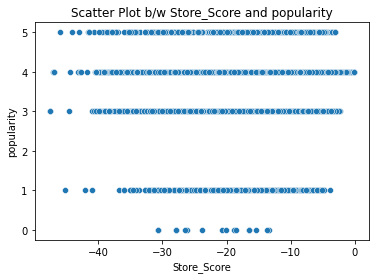

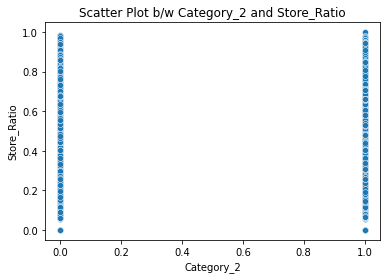

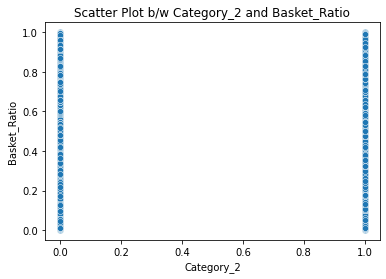

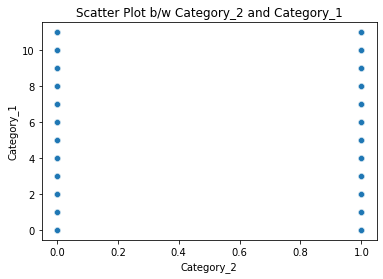

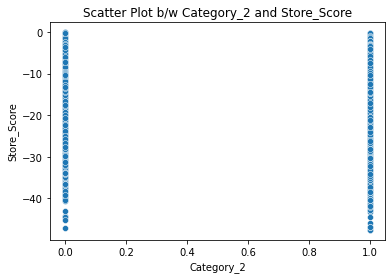

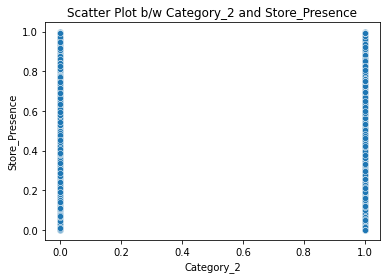

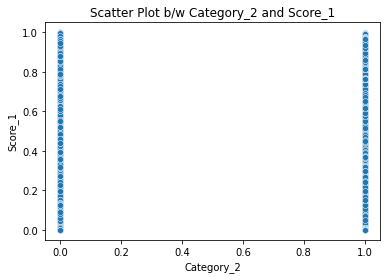

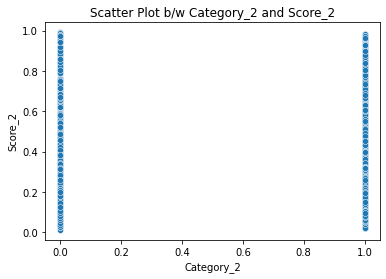

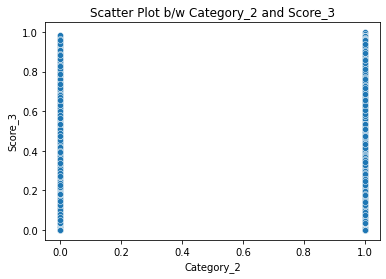

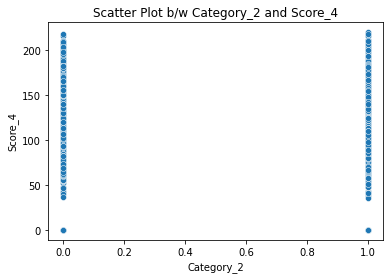

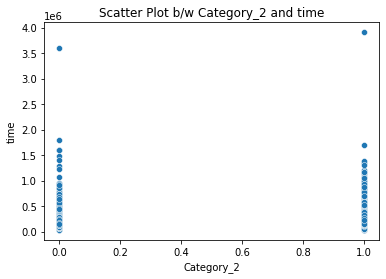

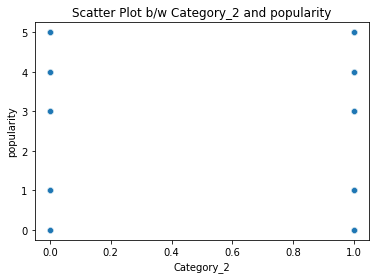

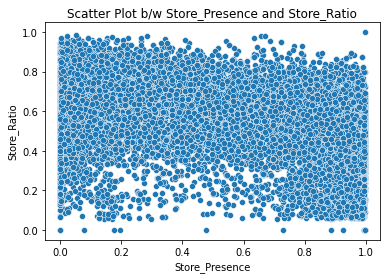

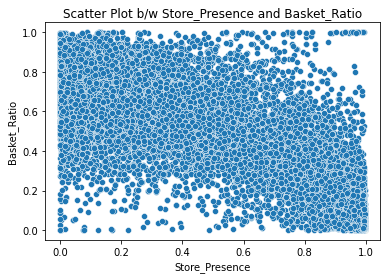

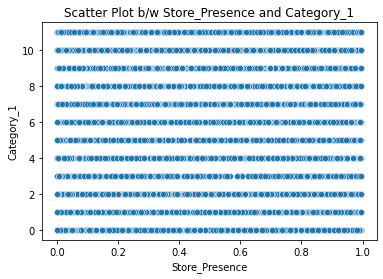

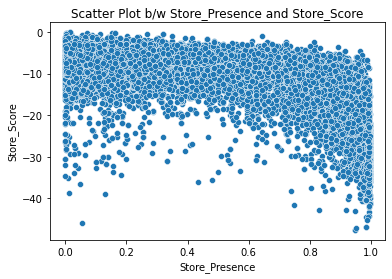

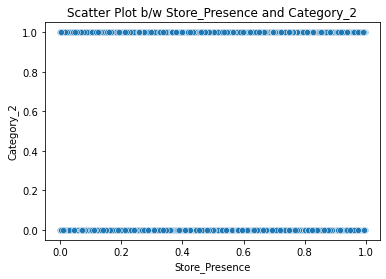

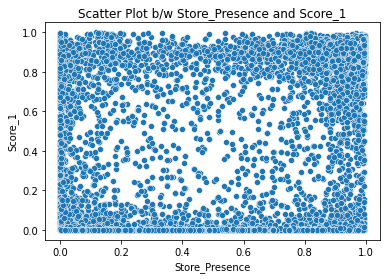

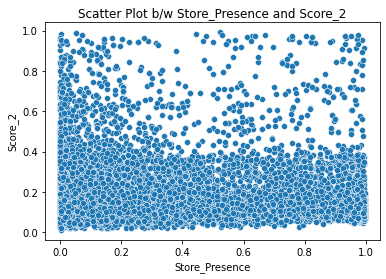

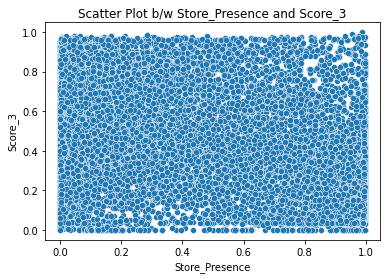

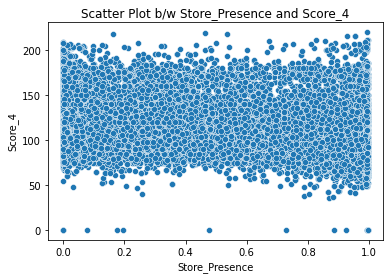

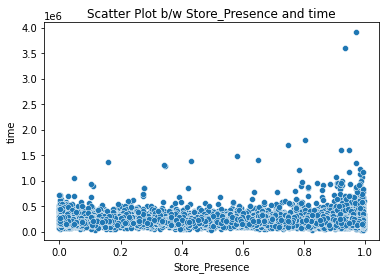

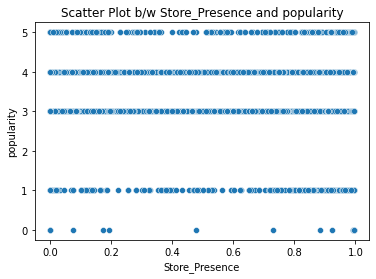

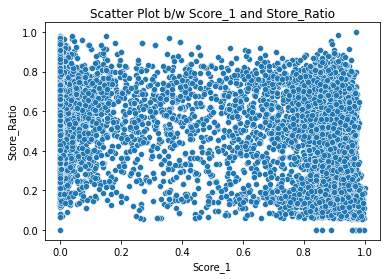

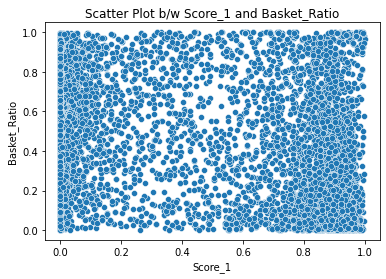

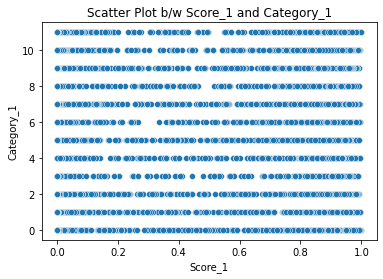

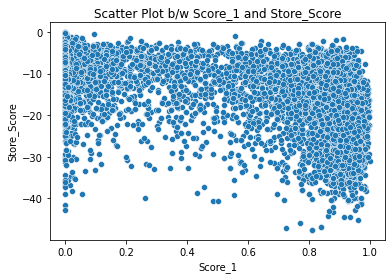

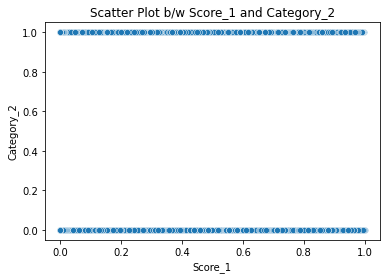

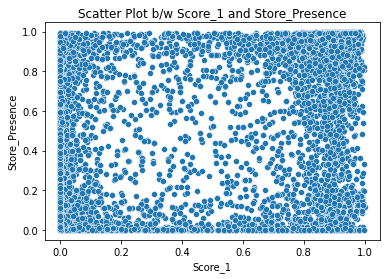

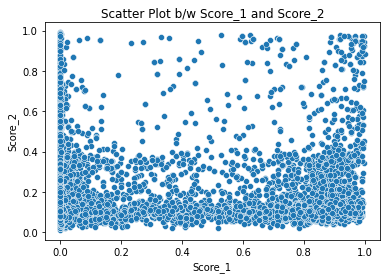

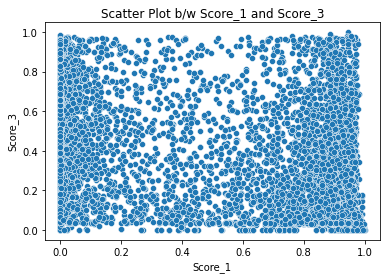

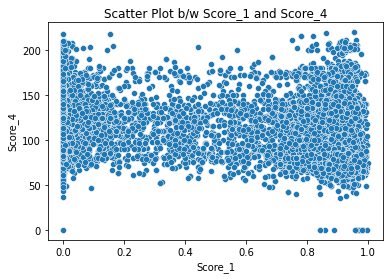

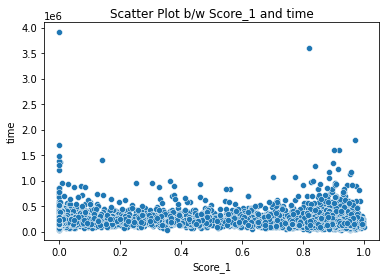

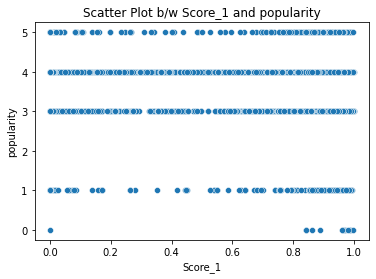

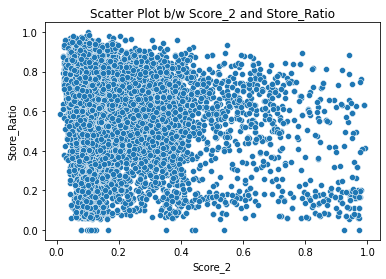

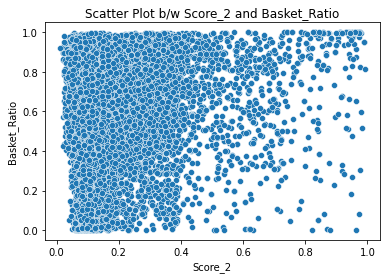

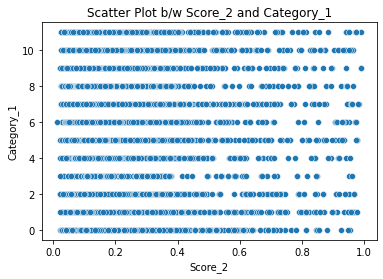

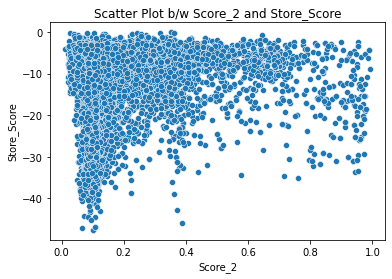

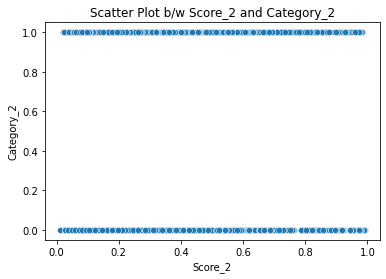

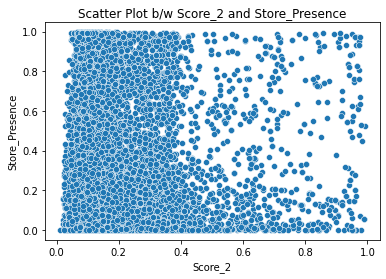

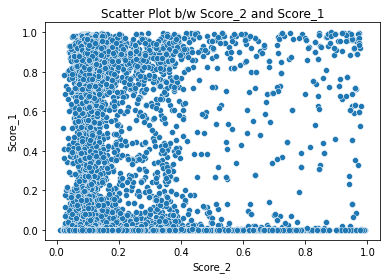

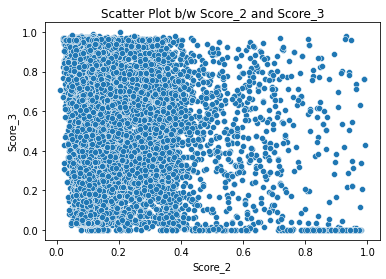

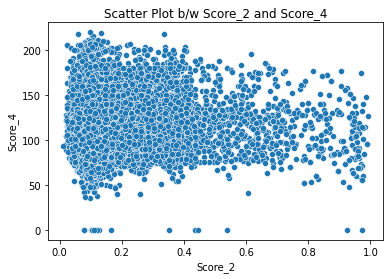

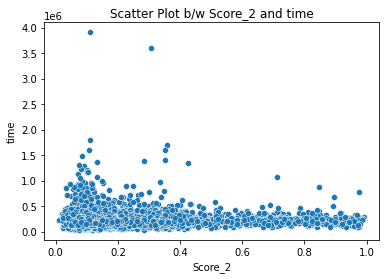

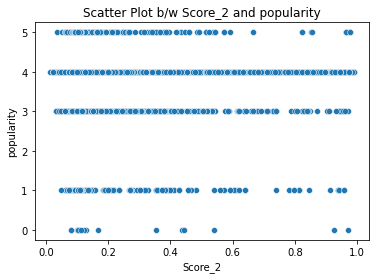

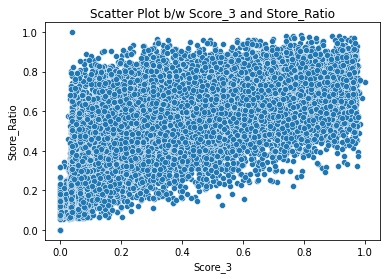

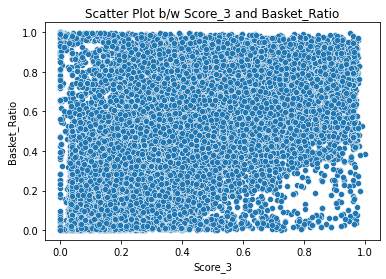

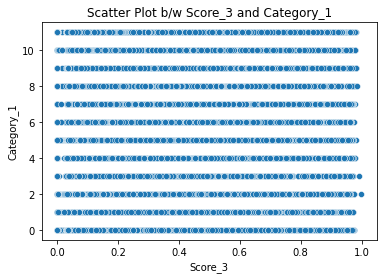

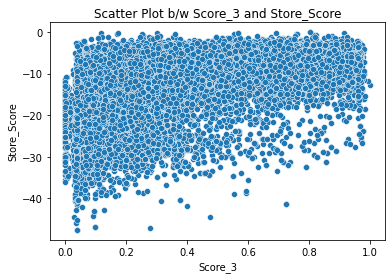

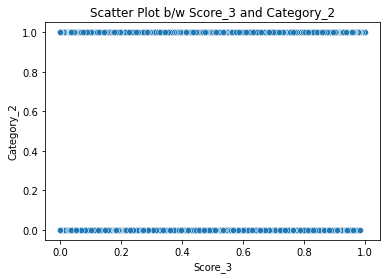

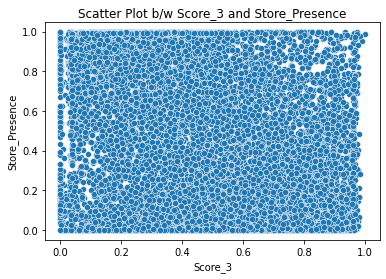

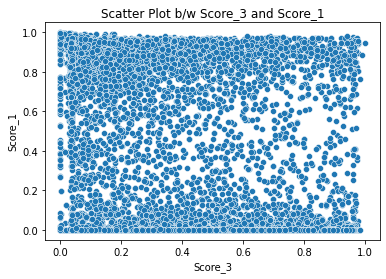

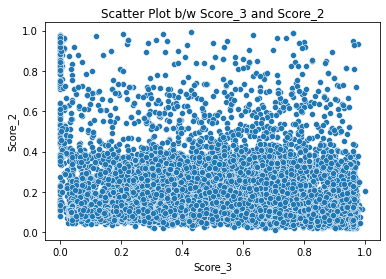

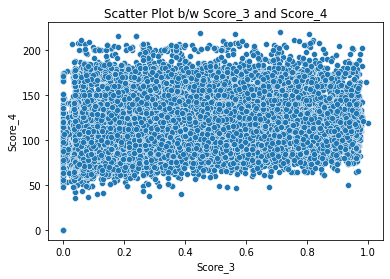

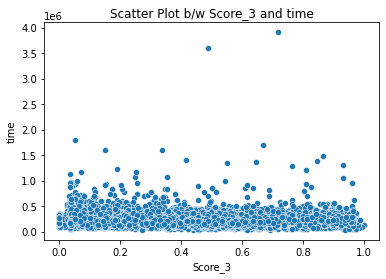

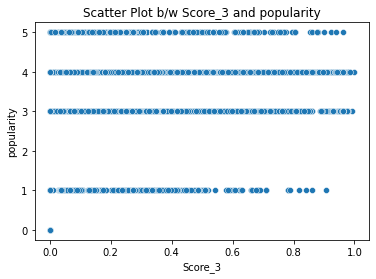

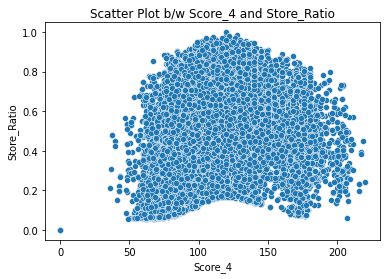

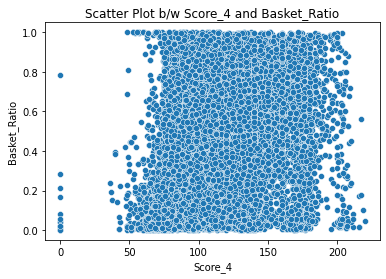

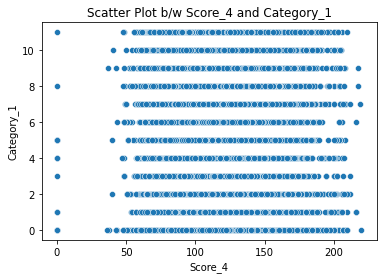

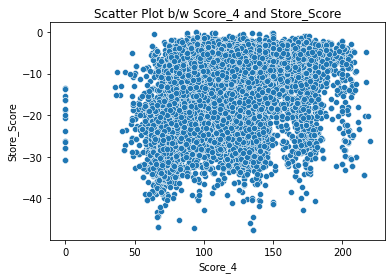

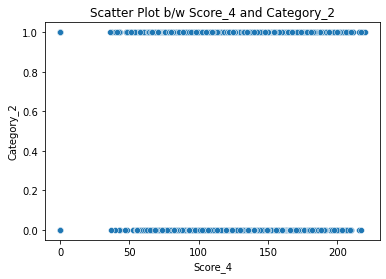

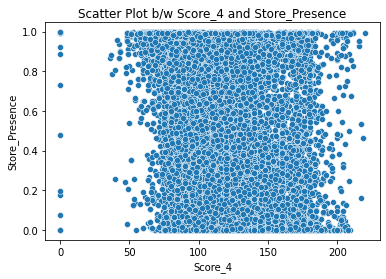

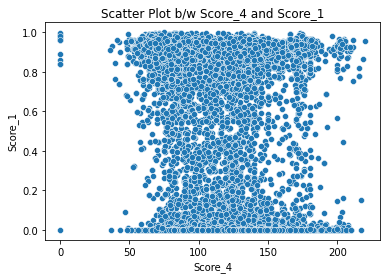

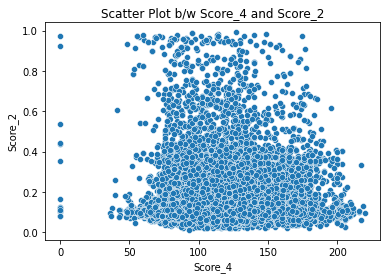

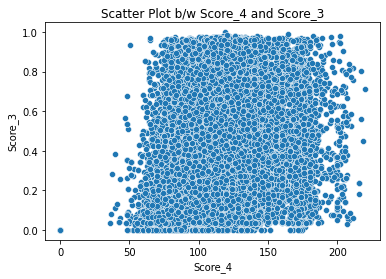

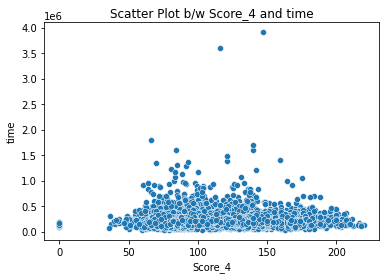

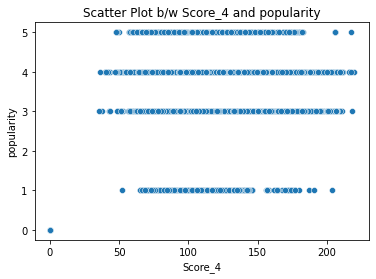

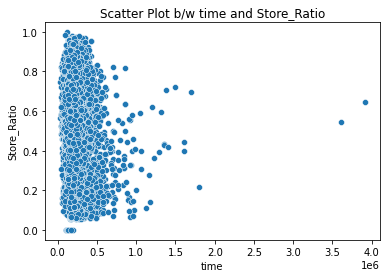

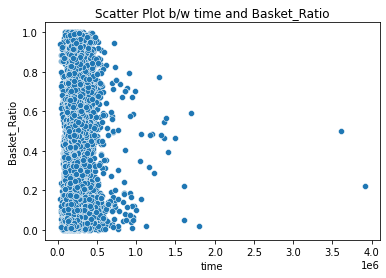

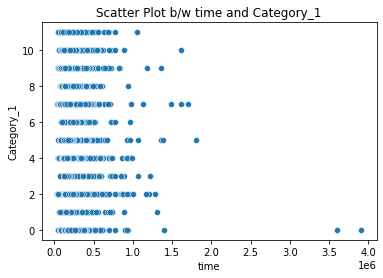

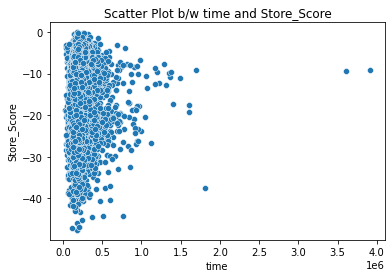

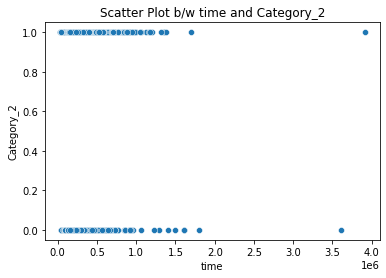

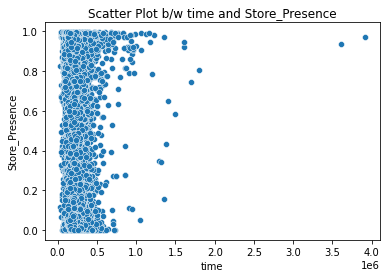

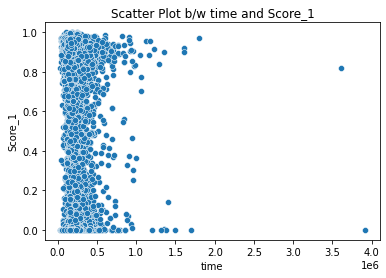

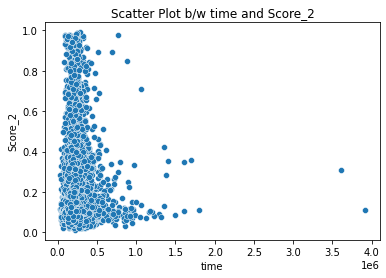

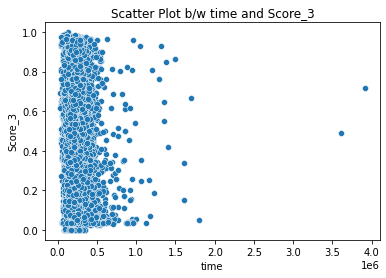

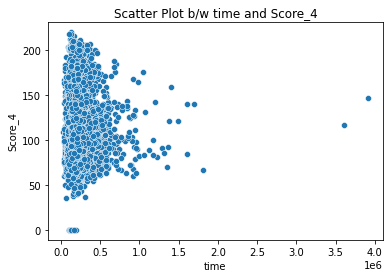

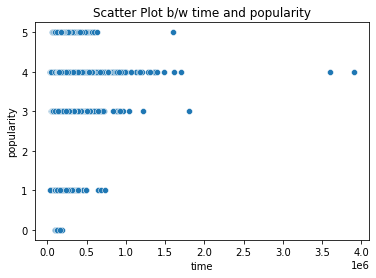

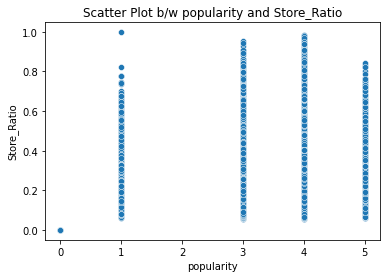

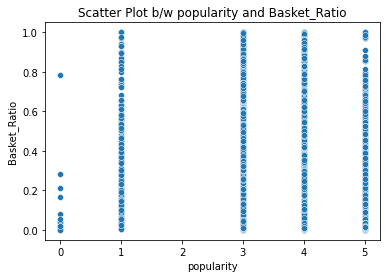

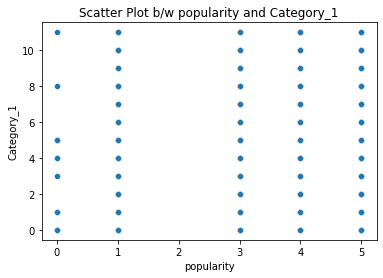

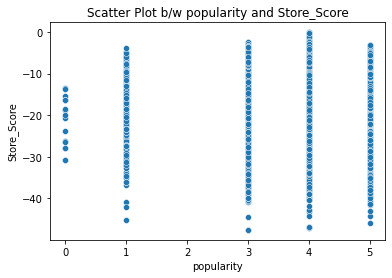

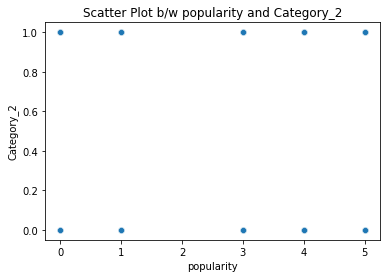

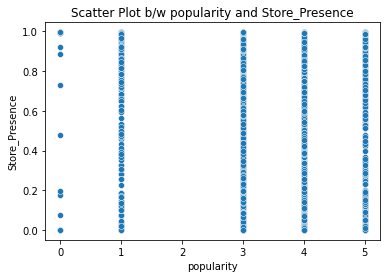

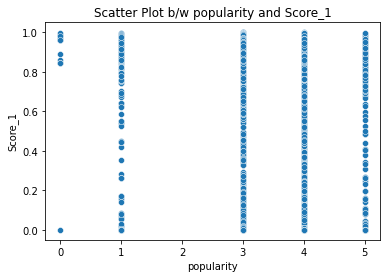

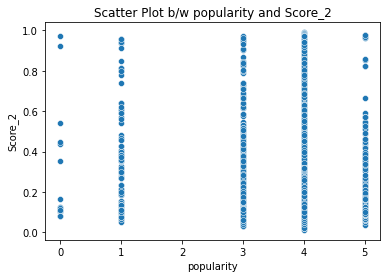

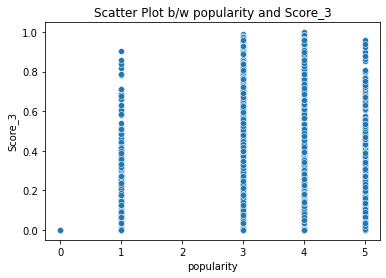

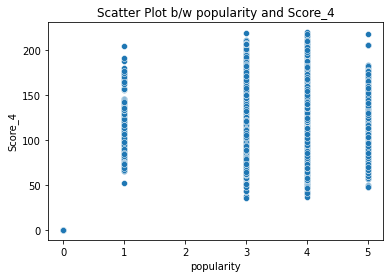

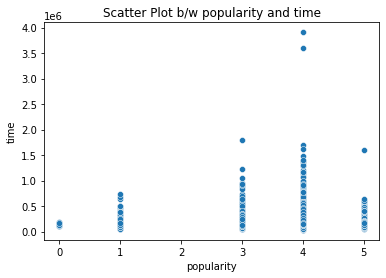

In [386]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

def scatter_plot(i,j):
  sns.scatterplot(df_train[i],df_train[j])
  plt.title('Scatter Plot b/w {} and {}'.format(i,j))
  plt.xlabel(i)
  plt.ylabel(j)
  plt.show()

for i in df_train.columns:
  for j in df_train.columns:
    if i != j:
      scatter_plot(i,j)

** Observations from above scatter plot **

1. As value of store presence increases value of basket ratio decreases.
2. As value of store scrore increases value of basket ratio increases.
3. Increase in value of store ratio results in the increase of basket ratio's value

# VIF - Variance inflation factor

In [201]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores

In [202]:
# Calculating VIF for each feature.
vif_scores(df_train)

Independent Features  VIF Scores
0           Store_Ratio   14.914265
1          Basket_Ratio   14.970646
2            Category_1    3.132183
3           Store_Score   11.643901
4            Category_2    2.867207
5        Store_Presence    7.133915
6               Score_1    3.591894
7               Score_2    2.788632
8               Score_3    6.523408
9               Score_4   13.675795
10                 time    6.047401
11           popularity   38.244453

Observations:

Multicollinearity exists. Need to be accounted for, when considering linear models like Logistic Regression

# Preprocessing

In [323]:
#convert the time column into more columns like hour, month, day, year , minute
df_train.head(5)

Store_Ratio  Basket_Ratio  Category_1  ...  Score_4    time  popularity
0        0.407       0.00380           2  ...  113.911  189125           4
1        0.234       0.10500           0  ...   76.332  186513           4
2        0.668       0.72600           9  ...  124.075  172143           4
3        0.184       0.00561           4  ...   79.037  184000           5
4        0.231       0.13100           6  ...  109.560  186507           3

[5 rows x 12 columns]

In [324]:
df_train['minute'] = pd.to_datetime(df_train['time'].astype(int),unit='s').dt.minute
df_train['hour'] = pd.to_datetime(df_train['time'].astype(int),unit='s').dt.hour
df_train['day'] = pd.to_datetime(df_train['time'].astype(int),unit='s').dt.day
df_train['month'] = pd.to_datetime(df_train['time'].astype(int),unit='s').dt.month
df_train['year'] = pd.to_datetime(df_train['time'].astype(int),unit='s').dt.year

In [325]:
df_train.drop(['time'],axis=1,inplace=True)

In [326]:
df_train.head(5)

Store_Ratio  Basket_Ratio  Category_1  Store_Score  ...  hour  day  month  year
0        0.407       0.00380           2      -35.865  ...     4    3      1  1970
1        0.234       0.10500           0      -19.884  ...     3    3      1  1970
2        0.668       0.72600           9       -7.512  ...    23    2      1  1970
3        0.184       0.00561           4      -34.357  ...     3    3      1  1970
4        0.231       0.13100           6      -22.842  ...     3    3      1  1970

[5 rows x 16 columns]

# Scaling



In [327]:
# Helper function for scaling all the numerical data using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train.drop(['minute','hour','day','month','year','popularity'],axis=1)))
df_train_scaled.columns = df_train.drop(['minute','hour','day','month','year','popularity'],axis=1).columns

In [328]:
X_train = df_train_scaled.join(df_train[['minute','hour','day','month','year']], how = 'outer')
y_train = df_train.popularity
X_train.head(5)

Store_Ratio  Basket_Ratio  Category_1  Store_Score  ...  hour  day  month  year
0     0.407816      0.003585    0.181818     0.246563  ...     4    3      1  1970
1     0.234469      0.104807    0.000000     0.583026  ...     3    3      1  1970
2     0.669339      0.725941    0.818182     0.843506  ...    23    2      1  1970
3     0.184369      0.005395    0.363636     0.278312  ...     3    3      1  1970
4     0.231463      0.130812    0.545455     0.520749  ...     3    3      1  1970

[5 rows x 15 columns]

#Splitting the data into train and test set

In [330]:
# Import train_test_split from sklearn
# split data into 95% train , 5% test and random state 42
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X_train,pd.DataFrame(y_train),stratify = pd.DataFrame(y_train))

In [331]:
# check shape of X_train
Xtrain.shape

(13656, 15)

In [332]:
# check for nan value in X_train
Xtrain.isnull().any()

Store_Ratio       False
Basket_Ratio      False
Category_1        False
Store_Score       False
Category_2        False
Store_Presence    False
Score_1           False
Score_2           False
Score_3           False
Score_4           False
minute            False
hour              False
day               False
month             False
year              False
dtype: bool

In [401]:
ytrain.value_counts()

popularity
4             11423
3              1625
5               354
1               242
0                12
dtype: int64

# Modelling

In [335]:
# helper function for metrics

def metric_calc(clf):
    from sklearn.metrics import log_loss,f1_score,roc_auc_score
    y_tr_pred = clf.predict(Xtrain)
    y_te_pred = clf.predict(Xtest)
    print('*********************************************************')
    print('*********************************************************')
    print('The metrics for train data are')
    #print('Log_Loss is', log_loss(ytrain,y_tr_pred))
    print('f1_Score is', f1_score(ytrain,y_tr_pred,average='weighted'))
    print('*********************************************************')
    print('The metrics for test data are')
    #print('Log_Loss is', log_loss(ytest,y_te_pred))
    print('f1_Score is', f1_score(ytest,y_te_pred,average='weighted'))
    print('*********************************************************')
    print('*********************************************************')
    


# **#RANDOM FOREST CLASSIFIER**

In [405]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(random_state = 2022,n_jobs = -1, class_weight='balanced')
clf2.fit(Xtrain,ytrain.values.ravel())
metric_calc(clf2)

*********************************************************
*********************************************************
The metrics for train data are
f1_Score is 1.0
*********************************************************
The metrics for test data are
f1_Score is 0.852855967413158
*********************************************************
*********************************************************


# DESISION TREE CLASSICIFIER

In [409]:
from sklearn.tree import DecisionTreeClassifier
clf5 = DecisionTreeClassifier(class_weight = 'balanced')
clf5.fit(Xtrain,ytrain.values.ravel())
metric_calc(clf5)

*********************************************************
*********************************************************
The metrics for train data are
f1_Score is 1.0
*********************************************************
The metrics for test data are
f1_Score is 0.8130740689439749
*********************************************************
*********************************************************


# GRADIENT BOOSTING CLASSIFIER

In [411]:
from sklearn.ensemble import GradientBoostingClassifier
clf7 = GradientBoostingClassifier()
clf7.fit(Xtrain,ytrain.values.ravel())
metric_calc(clf7)

*********************************************************
*********************************************************
The metrics for train data are
f1_Score is 0.8314444061640966
*********************************************************
The metrics for test data are
f1_Score is 0.7955966060623871
*********************************************************
*********************************************************


# BAGGING CLASSIFIER

In [358]:
from sklearn.ensemble import BaggingClassifier
clf8 = BaggingClassifier()
clf8.fit(Xtrain,ytrain.values.ravel())
metric_calc(clf8)

*********************************************************
*********************************************************
The metrics for train data are
f1_Score is 0.9930156215069066
*********************************************************
The metrics for test data are
f1_Score is 0.846361633090483
*********************************************************
*********************************************************


# VOTING CLASSIFIER

In [170]:
# better without adaboost and gradient boost algo
from sklearn.ensemble import VotingClassifier
estimators=[('lr', clf1), ('rf', clf2),('svm',clf4),('dt',clf5),('knn',clf6),('bagging',clf8)]
clf9 = VotingClassifier(estimators,voting='hard')
clf9.fit(Xtrain,ytrain.values.ravel())
metric_calc(clf9)


*********************************************************
*********************************************************
The metrics for train data are
f1_Score is 0.9743249302965427
*********************************************************
The metrics for test data are
f1_Score is 0.8458571279448807
*********************************************************
*********************************************************


# XGB CLASSIFIER

In [336]:
from xgboost import XGBClassifier
clf11 = XGBClassifier()
clf11.fit(Xtrain,ytrain.values.ravel())
metric_calc(clf11)


*********************************************************
*********************************************************
The metrics for train data are
f1_Score is 0.7927547779194577
*********************************************************
The metrics for test data are
f1_Score is 0.7769846073914602
*********************************************************
*********************************************************


# Hyperparameter tuning



In [173]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## **Random Forest Classifier**

In [417]:
clf_t2 = RandomForestClassifier()
params = {'criterion' : ['gini', 'entropy'], 'max_depth' : [5,10, 15, 22,35,50,70,100, None], 'min_samples_split' : [2,5,9,15,23,35,50,75,100],
          'max_features' : ['auto','sqrt','log2',None],'min_samples_leaf':[1,2,5,10]}
rs = RandomizedSearchCV(estimator=clf_t2,param_distributions=params,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
rs.fit(Xtrain,ytrain.values.ravel())
print(rs.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 22, 'criterion': 'entropy'}


In [418]:
model = RandomForestClassifier( min_samples_split = 2, min_samples_leaf = 1, max_features = 'log2', max_depth = 22, criterion = 'entropy')
model.fit(Xtrain,ytrain.values.ravel())
metric_calc(model)

*********************************************************
*********************************************************
The metrics for train data are
f1_Score is 1.0
*********************************************************
The metrics for test data are
f1_Score is 0.8537684715963119
*********************************************************
*********************************************************


# # **XGB Classifier Tuning**

In [174]:
clf_t1 = XGBClassifier()
params = {'max_depth' : [1,3,5,7,12],'learning_rate':[1e-3,1e-2,0.015,0.025,0.05,0.1],'min_child_weight':[1,3,7,12,20,40,60,80,100],
         'colsample_bytree':[0.6,0.7,0.8,0.9,1],'subsample':[0.6,0.7,0.8,0.9,1]}
rs = RandomizedSearchCV(estimator=clf_t1,param_distributions=params,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
rs.fit(Xtrain,ytrain.values.ravel())
print(rs.best_params_)
model = rs.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.05, 'colsample_bytree': 0.6}


In [419]:
clf_xgb_tuned = XGBClassifier(subsample =  0.6, min_child_weight = 1, max_depth = 50, learning_rate =  0.05, colsample_bytree = 0.6)
clf_xgb_tuned.fit(Xtrain,ytrain.values.ravel())
metric_calc(clf_xgb_tuned)

*********************************************************
*********************************************************
The metrics for train data are
f1_Score is 0.9883584381033278
*********************************************************
The metrics for test data are
f1_Score is 0.8521369323532736
*********************************************************
*********************************************************


In [361]:
from sklearn.ensemble import BaggingClassifier
clf_bag = BaggingClassifier(base_estimator = clf_xgb_tuned)
clf_bag.fit(Xtrain,ytrain.values.ravel())
metric_calc(clf_bag)

*********************************************************
*********************************************************
The metrics for train data are
f1_Score is 0.9462158615853675
*********************************************************
The metrics for test data are
f1_Score is 0.8349987453286193
*********************************************************
*********************************************************


In [420]:
# better without adaboost and gradient boost algo
from sklearn.ensemble import VotingClassifier
estimators=[('rf',model),('xgb',clf_xgb_tuned),('bagging',clf8),('bg',clf_bag)]
clf9 = VotingClassifier(estimators,voting='hard')
clf9.fit(Xtrain,ytrain.values.ravel())
metric_calc(clf9)


*********************************************************
*********************************************************
The metrics for train data are
f1_Score is 0.9946105469065579
*********************************************************
The metrics for test data are
f1_Score is 0.8538482241140049
*********************************************************
*********************************************************


# **Other Base Models - Tried BUT NOT used**


# **Logistic Regression**

In [162]:
from sklearn.linear_model import LogisticRegression 
clf1 = LogisticRegression(solver='liblinear')
clf1.fit(Xtrain,ytrain)
metric_calc(clf1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*********************************************************
*********************************************************
The metrics for train data are
f1_Score is 0.7703604141310957
*********************************************************
The metrics for test data are
f1_Score is 0.7750206141458753
*********************************************************
*********************************************************


# **#SUPORT VECTOR CLASSIFIER**

In [ ]:
from sklearn.svm import SVC
clf4 = SVC()
clf4.fit(Xtrain,ytrain.values.ravel())
metric_calc(clf4)

*********************************************************
*********************************************************
The metrics for train data are
f1_Score is 0.7620029026962554
*********************************************************
The metrics for test data are
f1_Score is 0.7621059358733949
*********************************************************
*********************************************************


# ADA BOOST CLASSIFIER

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf3 = AdaBoostClassifier()
clf3.fit(Xtrain,ytrain.values.ravel())
metric_calc(clf3)

*********************************************************
*********************************************************
The metrics for train data are
f1_Score is 0.1654918641303189
*********************************************************
The metrics for test data are
f1_Score is 0.16801934709168212
*********************************************************
*********************************************************


# K NEIGHBOUR CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf6 = KNeighborsClassifier(n_neighbors = 4)
clf6.fit(Xtrain,ytrain.values.ravel())
metric_calc(clf6)


*********************************************************
*********************************************************
The metrics for train data are
f1_Score is 0.8620548633934285
*********************************************************
The metrics for test data are
f1_Score is 0.7927592065522234
*********************************************************
*********************************************************
